# Coinbase Data Analyst Take Home Exam

- Yucheng Liu: <yc.yuchengliu@gmail.com>
- October 2024

## Abstract
This project demonstrates the key technical skills required for a data analyst role in Coinbase Internal Audit. I utilized Snowflake SQL to import datasets and perform analysis by joining and aggregating tables. Additionally, I used Python in Jupyter Notebook with libraries such as Pandas for data manipulation and scatter plots to explore and visualize correlations in the data. I also integrated the [CryptoCompare API](https://pypi.org/project/cryptocompare/) to retrieve real-time cryptocurrency prices.

## Github Repo

In addition to this notebook, the project is also available in my repo. Please use the links below.
- [Notebook tbd](xxx)
- [SQL tbd](xxx)

## Datasets Used

In this project, we use three distinct csv files containing data for the following:
- **Users**, including an id, date the user signed up, and their risk score (a number assigned by our internal risk model).
- **Accounts** for those users, including the date the account was created, and currency.
- **Ledger** Entries for these accounts; these are single-entry, indicating the date and amount by which the account changed.

### **Prepration**
Import Libraries

In [1]:
#!pip install pandas
#!pip install matplotlib
#!pip install cryptocompare
#!pip install snowflake-connector-python
#!pip install seaborn

In [2]:
import pandas as pd
import snowflake.connector
import matplotlib.pyplot as plt
import cryptocompare as cy
import seaborn as sns 

Connect to Snowflake

In [3]:
sf_pw = input('Enter Password:')

con = snowflake.connector.connect(
    user = 'yuchengliu',
    password = sf_pw,
    account = 'ed01722.us-east4.gcp',
    warehouse = 'COMPUTE_WH'
)
con.cursor()
print("Snowflake Connected Successfully!")

Snowflake Connected Successfully!


Helper Function(s)

In [4]:
#get_sf_data function retrieves data from snowflake by executing a SQL query and returns the results in dataframe for analysis.
def get_sf_data(query):
    sql = query 
    output_df = pd.read_sql(sql, con)
    return output_df

def get_simple_plot(dataframe_column, title, x_lable, y_lable, width):
    plt.figure(figsize=(6, 4))
    sns.histplot(dataframe_column, kde=True, binwidth=width)
    plt.title(title)
    plt.xlabel(x_lable)
    plt.ylabel(y_lable)
    plt.tight_layout()
    plt.show()

### **Question 1**  
Draw an entity-relationship diagram for the data. Indicate the cardinality of the relationships.

![title](table_relationship_diagram.png)


### **Question 2**  
Load the CSV files into a SQL database.

I created a free Snowflake account and uploaded the three CSV files. Below is a screenshot of the datasets after they were successfully loaded.  

![title](screenshot_sf.png)

### **Question 3**
Calculate and plot the following distributions

#### **a. Number of accounts per user**

In [5]:
#The query counts the number of accounts for each user. We use LEFT JOIN here to ensure that uses with 0 accounts are also included.
q3_a_query = f"""
        SELECT u.user_id, COUNT(a.account_id) AS number_of_accounts
        FROM COINBASE.PUBLIC.USERS u
        LEFT JOIN COINBASE.PUBLIC.ACCOUNTS a ON u.user_id = a.user_id
        GROUP BY 1
        ORDER BY 2 DESC;
"""

#once the query is built, we can call get_sf_data function to retreive data in dataframe format.
number_of_account_per_user = get_sf_data(q3_a_query)
number_of_account_per_user.head(10)

/var/folders/4l/t9877gg17j99nd_pc56r_pq40000gn/T/ipykernel_78609/2586534245.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output_df = pd.read_sql(sql, con)


,USER_ID,NUMBER_OF_ACCOUNTS
0,28c6d03ee715c3c6a69cd960ca404123,130
1,2728a6faf3a6de76ca9fcb456f583dc8,17
2,5867ac641fb362074ac1bc6dde7f0c5f,16
3,91c0fbdf1ce91ab3b175a5510f9a8a63,15
4,b200203a377aa50d31dd589ce5cc018f,12
5,c1942d1b8570cb346c3b55f28e0ddad5,11
6,bbb45a52e1a3bc9ac178a907c57d555b,11
7,8e9379e729b4439c32f81dec2f2fa569,10
8,a00acd0117e6cccfade7a09c65cbe204,10
9,9d5ca06f5661dbf5324f4aba3e509e9d,9


In [6]:
number_of_account_per_user['NUMBER_OF_ACCOUNTS'].describe()

count    1000.0000
mean        4.7110
std         4.1534
min         2.0000
25%         4.0000
50%         4.0000
75%         5.0000
max       130.0000
Name: NUMBER_OF_ACCOUNTS, dtype: float64

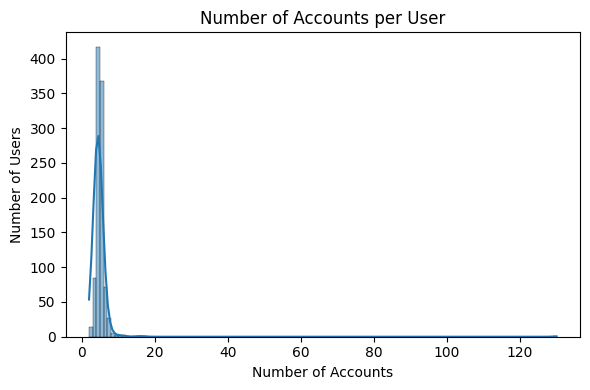

In [7]:
get_simple_plot(number_of_account_per_user['NUMBER_OF_ACCOUNTS'], 'Number of Accounts per User', 'Number of Accounts', 'Number of Users', 1)

Looking at the number of accounts per user plot above, we can make a few observations:

- Most users tend to have around 4 to 5 accounts, with a median of 4 accounts.  
- The average number of accounts per user is about 4.71, but there's significant variation in account ownership, with the highest being 130 accounts.  
- Most users have a small to moderate number of accounts, but there are some outliers with many accounts.

#### **b. Number of distinct currencies per user.**

In [8]:
q3_b_query = f"""
            SELECT u.user_id, COUNT(DISTINCT(a.currency)) AS number_of_distinct_currencies
            FROM COINBASE.PUBLIC.USERS u
            LEFT JOIN COINBASE.PUBLIC.ACCOUNTS a ON u.user_id = a.user_id
            GROUP BY 1
            ORDER BY 2 DESC;
"""

number_of_currency_per_user = get_sf_data(q3_b_query)
number_of_currency_per_user.head(10)

/var/folders/4l/t9877gg17j99nd_pc56r_pq40000gn/T/ipykernel_78609/2586534245.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output_df = pd.read_sql(sql, con)


,USER_ID,NUMBER_OF_DISTINCT_CURRENCIES
0,befbddf34f71095d3fe49efd79a8996e,5
1,849b234ec990304fb126b8f5c4d80662,5
2,48cc9779135b57b6a8d4052e93bb843a,5
3,9809ea41344fe457cdf908e5c55562b4,5
4,e32a56807ab3e71bb5e07f7ffc8c5174,5
5,c8691d1c60e9537da42e187170ab369f,5
6,6b2f573b84f1cb31d3d6031016816d43,5
7,083743fdb35ded42d3b6cd68e2d3fa68,5
8,e860c1f7ee8c4ac2d1d1b060c93b2b44,5
9,8a769296f770704d32e2b754a29d85ea,5


In [9]:
number_of_currency_per_user['NUMBER_OF_DISTINCT_CURRENCIES'].describe()

count    1000.000000
mean        3.371000
std         0.712648
min         2.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: NUMBER_OF_DISTINCT_CURRENCIES, dtype: float64

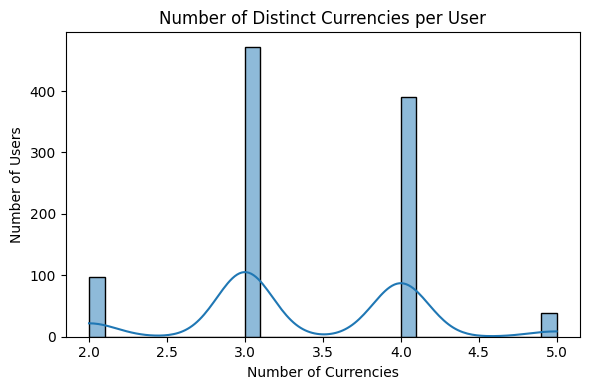

In [10]:
get_simple_plot(number_of_currency_per_user['NUMBER_OF_DISTINCT_CURRENCIES'], 'Number of Distinct Currencies per User', 'Number of Currencies', 'Number of Users', 0.1)

Most users tend to own between 3 and 4 types of currency, with relatively little variation. There are no extreme outliers, and only a few users own the maximum of 5 currencies. This indicates that users generally hold a small and similar range of currencies.

#### **c. Number of days it takes for users to make their first deposit.**

In [11]:
q3_c_query = f"""
        SELECT u.user_id, u.created_at, DATEDIFF('day', u.created_at, MIN(l.created_at)) AS days_to_first_deposit
        FROM COINBASE.PUBLIC.USERS u
        JOIN COINBASE.PUBLIC.ACCOUNTS a ON u.user_id = a.user_id
        JOIN COINBASE.PUBLIC.LEDGER l ON a.account_id = l.account_id
        WHERE l.amount > 0
        GROUP BY 1,2
        ORDER BY 3 DESC;
"""

number_of_days_first_deposit = get_sf_data(q3_c_query)
number_of_days_first_deposit.head(10)

/var/folders/4l/t9877gg17j99nd_pc56r_pq40000gn/T/ipykernel_78609/2586534245.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output_df = pd.read_sql(sql, con)


,USER_ID,CREATED_AT,DAYS_TO_FIRST_DEPOSIT
0,c2ef646029858a80fd5b733c521e21e0,2013-04-21 20:11:35,1616
1,d82cff3eb5f74538e10aecc4f1416f78,2013-11-18 18:13:47,1389
2,6d9333dcb868de360c50c33364e8ea2a,2014-01-02 21:56:58,1374
3,4a06ae4f7b47874e85493a27dc2f42df,2013-12-13 15:19:28,1335
4,1eff7366e33c184a77cb2b41d61c2b65,2013-12-07 18:40:08,1310
5,6a092c1b4cdb7f1742c3a3719ab5929c,2014-04-12 13:01:29,1257
6,2d3ce8d1a5f086a4ee9efb36c5d1845e,2014-02-18 22:45:11,1211
7,ca4172f864238e8578a415e215713ea6,2014-06-20 16:59:36,1085
8,80a22e10cb53c3d3743fbe01ceec33dc,2014-01-09 05:00:47,1039
9,86c89b1ba16e4270bd4739c6b098735c,2014-11-23 10:05:02,881


In [12]:
number_of_days_first_deposit['DAYS_TO_FIRST_DEPOSIT'].describe()

count     991.000000
mean       38.643794
std       152.306692
min         0.000000
25%         0.000000
50%         1.000000
75%         9.000000
max      1616.000000
Name: DAYS_TO_FIRST_DEPOSIT, dtype: float64

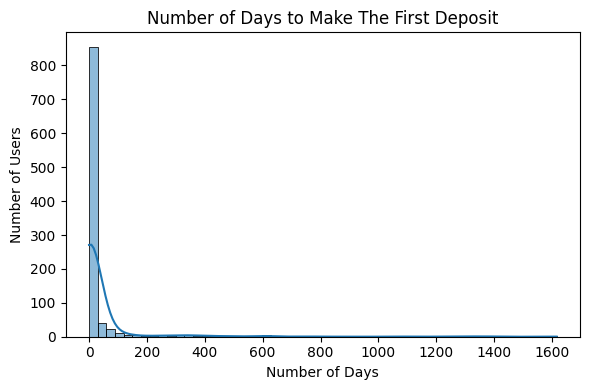

In [13]:
get_simple_plot(number_of_days_first_deposit['DAYS_TO_FIRST_DEPOSIT'], 'Number of Days to Make The First Deposit', 'Number of Days', 'Number of Users', 30)

On average, it takes about 39 days for users to make their first deposit. The majority of users (75%) make their first deposit within 9 days, and a significant portion do so on the same day. However, there is a wide range of behavior, as evidenced by the large standard deviation and maximum value, with some users taking much longer to deposit. 

#### **d. Number of days between a user’s first deposit and first withdrawal.**

In [14]:
q3_d_query = f"""
        SELECT u.user_id,
            MIN(CASE WHEN l.amount > 0 THEN l.created_at END) AS first_deposit,
            MIN(CASE WHEN l.amount < 0 THEN l.created_at END) AS first_withdrawal,
            DATEDIFF(
                'day', 
                MIN(CASE WHEN l.amount > 0 THEN l.created_at END),  -- First deposit date
                MIN(CASE WHEN l.amount < 0 THEN l.created_at END)   -- First withdrawal date
            ) AS days_between_first_deposit_and_withdrawal
        FROM 
            COINBASE.PUBLIC.USERS u
        JOIN 
            COINBASE.PUBLIC.ACCOUNTS a ON u.user_id = a.user_id
        JOIN 
            COINBASE.PUBLIC.LEDGER l ON a.account_id = l.account_id
        GROUP BY 1
        HAVING days_between_first_deposit_and_withdrawal IS NOT NULL
        ORDER BY 4 DESC;
"""

number_of_days_first_deposit_and_first_withdrawal = get_sf_data(q3_d_query)
number_of_days_first_deposit_and_first_withdrawal.head(10)

/var/folders/4l/t9877gg17j99nd_pc56r_pq40000gn/T/ipykernel_78609/2586534245.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output_df = pd.read_sql(sql, con)


,USER_ID,FIRST_DEPOSIT,FIRST_WITHDRAWAL,DAYS_BETWEEN_FIRST_DEPOSIT_AND_WITHDRAWAL
0,dbdf77833ee48da25845672c57d4fa9a,2013-11-09 17:33:26,2017-08-04 16:18:36,1364
1,0404795663f0281a0b539a65ed02d603,2014-03-03 16:21:19,2017-08-15 14:11:52,1261
2,6f17e6561b710769b3d1bab508ff9348,2014-05-01 17:06:51,2017-07-08 17:32:33,1164
3,0bc6ff0fd6e0408352e7635812bdcc1b,2013-12-02 21:22:45,2017-01-25 17:56:35,1150
4,4aff5d412b4aab1863f0fde85dd20bc6,2014-02-24 20:24:06,2017-03-20 22:27:22,1120
5,05460fdf4361e1a43bb7b3f47acfffba,2014-10-13 03:17:38,2017-07-03 18:19:47,994
6,e32a56807ab3e71bb5e07f7ffc8c5174,2013-10-06 04:05:13,2016-06-18 02:39:40,986
7,e8da57cf4944935892307a0e05905e9d,2013-10-23 19:12:48,2016-03-21 22:53:46,880
8,70672d581cbe29ad2c5e98bc700b05a4,2015-04-04 18:36:01,2017-04-20 20:52:01,747
9,6f6ede625256deb8c1998456618c1b51,2014-02-26 23:24:53,2015-12-29 22:13:53,671


In [15]:
number_of_days_first_deposit_and_first_withdrawal['DAYS_BETWEEN_FIRST_DEPOSIT_AND_WITHDRAWAL'].describe()

count     687.000000
mean       36.621543
std       142.286870
min         0.000000
25%         0.000000
50%         2.000000
75%        12.000000
max      1364.000000
Name: DAYS_BETWEEN_FIRST_DEPOSIT_AND_WITHDRAWAL, dtype: float64

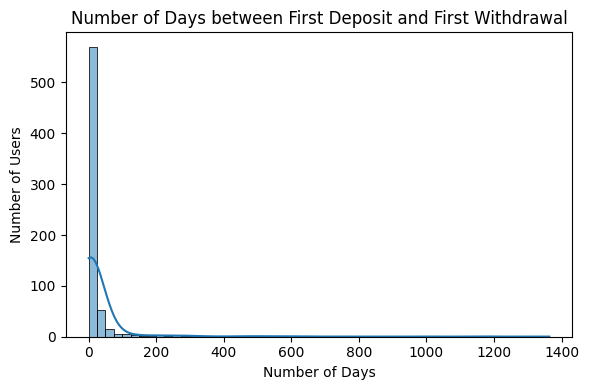

In [16]:
get_simple_plot(number_of_days_first_deposit_and_first_withdrawal['DAYS_BETWEEN_FIRST_DEPOSIT_AND_WITHDRAWAL'], 'Number of Days between First Deposit and First Withdrawal', 'Number of Days', 'Number of Users', 25)

On average, it takes about 37 days for users to make their first withdrawal after their first deposit. Most users (75%) make their first withdrawal within 12 days of their first deposit, with half doing so in just 2 days. However, the distribution is highly skewed, as few users do not make their first withdrawal over 1,000 days (3+ years).  

### **Question 4**
Task: Calculate and present the following:  

- High risk: Users with a score of 50 or higher  
- Medium risk: Users with a score between 10 and 49  
- Low risk: Users with a score below 10  

#### **a. Average transaction volume for high risk, medium risk, and low risk customers** 

In [17]:
q4_a_query = f"""
        SELECT 
            CASE
                WHEN u.risk_score IS NULL THEN 'Unknown Risk'
                WHEN u.risk_score >= 50 THEN 'High Risk'
                WHEN u.risk_score BETWEEN 10 AND 49 THEN 'Medium Risk'
                ELSE 'Low Risk'
            END AS risk_rating,
            COUNT(l.ledger_entry_id) AS average_transaction_volume,
            AVG(l.amount) AS average_transaction_amount
        FROM 
            COINBASE.PUBLIC.USERS u
        JOIN 
            COINBASE.PUBLIC.ACCOUNTS a ON u.user_id = a.user_id
        JOIN 
            COINBASE.PUBLIC.LEDGER l ON a.account_id = l.account_id
        GROUP BY 1
        ORDER BY 1;
"""

avg_transaction_for_each_risk = get_sf_data(q4_a_query)
avg_transaction_for_each_risk

/var/folders/4l/t9877gg17j99nd_pc56r_pq40000gn/T/ipykernel_78609/2586534245.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output_df = pd.read_sql(sql, con)


,RISK_RATING,AVERAGE_TRANSACTION_VOLUME,AVERAGE_TRANSACTION_AMOUNT
0,High Risk,539,0.017464
1,Low Risk,7707,0.158985
2,Medium Risk,15825,0.138432
3,Unknown Risk,719,-0.027104


#### **b. Average number of accounts for high risk, medium risk, and low risk customers**

In [18]:
q4_b_query = f"""
            WITH user_account_counts_with_risk_rating AS (
                SELECT 
                    u.user_id,
                    COUNT(a.account_id) AS number_of_accounts,
                    CASE 
                        WHEN u.risk_score IS NULL THEN 'Unknown Risk'
                        WHEN u.risk_score >= 50 THEN 'High Risk'
                        WHEN u.risk_score BETWEEN 10 AND 49 THEN 'Medium Risk'
                        ELSE 'Low Risk'
                    END AS risk_rating
                FROM 
                    COINBASE.PUBLIC.USERS u
                LEFT JOIN 
                    COINBASE.PUBLIC.ACCOUNTS a ON u.user_id = a.user_id
                GROUP BY 
                    u.user_id, u.risk_score
            )
            SELECT risk_rating, AVG(number_of_accounts) AS average_number_of_accounts
            FROM user_account_counts_with_risk_rating
            GROUP BY 1
            ORDER BY 1;
"""

avg_account_for_each_risk = get_sf_data(q4_b_query)
avg_account_for_each_risk

/var/folders/4l/t9877gg17j99nd_pc56r_pq40000gn/T/ipykernel_78609/2586534245.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output_df = pd.read_sql(sql, con)


,RISK_RATING,AVERAGE_NUMBER_OF_ACCOUNTS
0,High Risk,4.461538
1,Low Risk,5.660000
2,Medium Risk,4.735294
3,Unknown Risk,3.650273


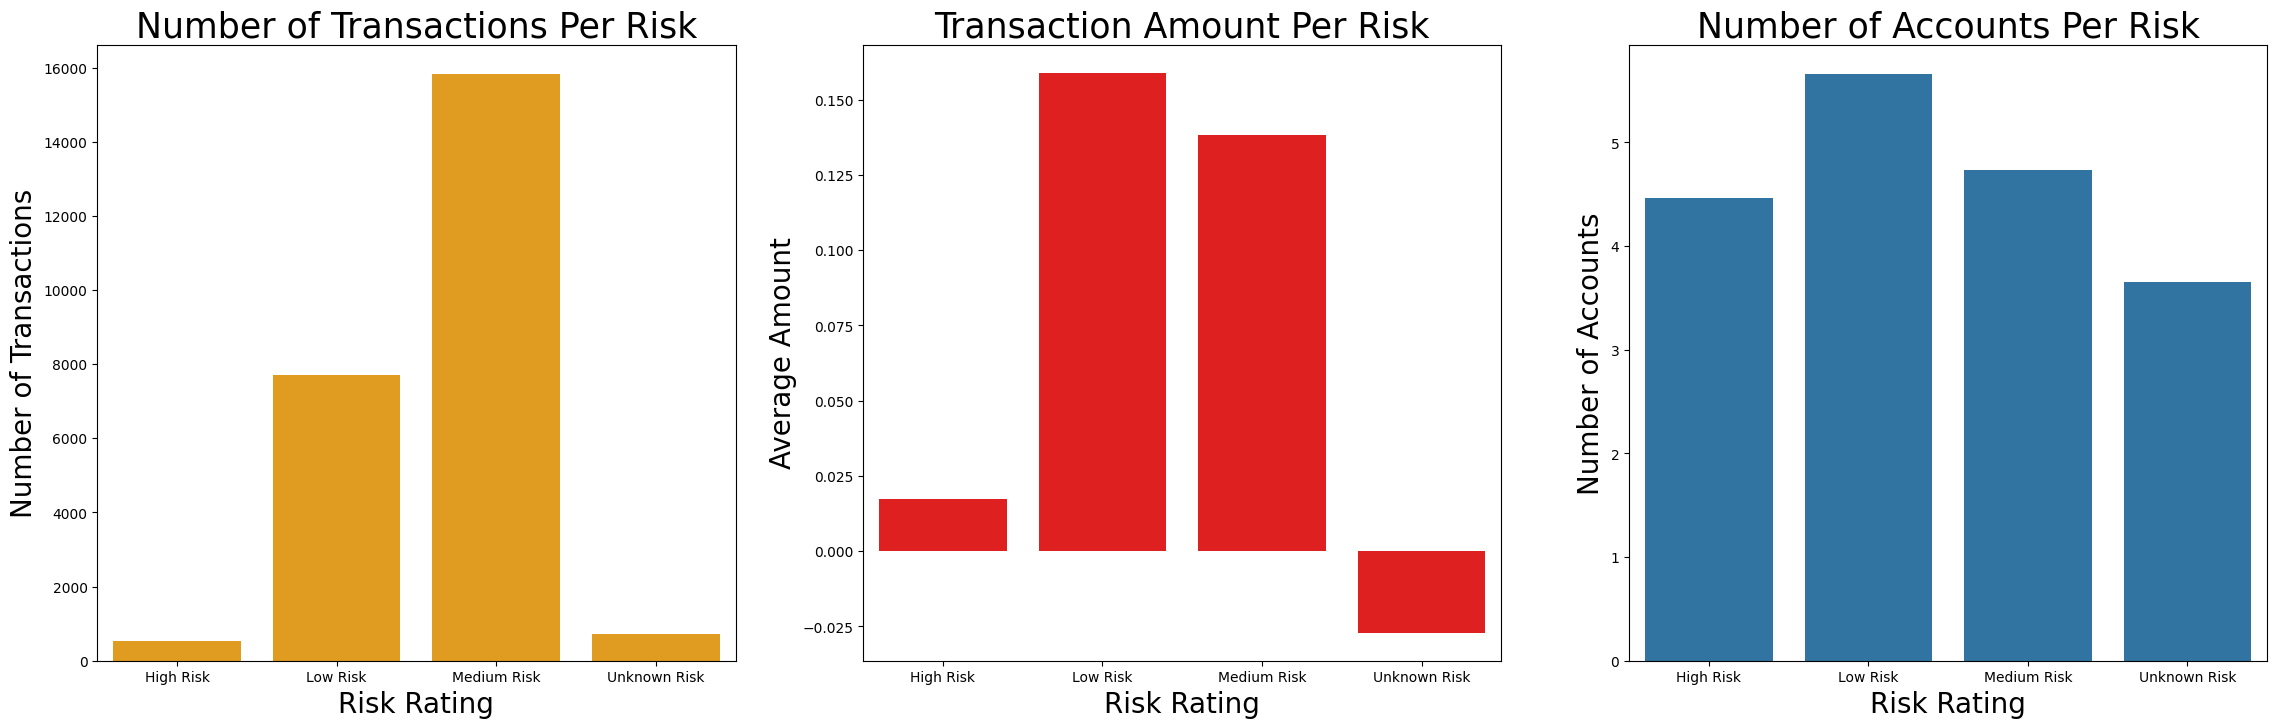

In [19]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(28, 8))

sns.barplot(x='RISK_RATING', y='AVERAGE_TRANSACTION_VOLUME', data=avg_transaction_for_each_risk, ax=axes[0], color='orange') 
axes[0].set_title('Number of Transactions Per Risk', size = 25)
axes[0].set_xlabel('Risk Rating', size = 20)
axes[0].set_ylabel('Number of Transactions', size = 20)

sns.barplot(x='RISK_RATING', y='AVERAGE_TRANSACTION_AMOUNT', data=avg_transaction_for_each_risk, ax=axes[1], color='red') 
axes[1].set_title('Transaction Amount Per Risk', size = 25)
axes[1].set_xlabel('Risk Rating', size = 20)
axes[1].set_ylabel('Average Amount', size = 20)

sns.barplot(x='RISK_RATING', y='AVERAGE_NUMBER_OF_ACCOUNTS', data=avg_account_for_each_risk, ax=axes[2])
axes[2].set_title('Number of Accounts Per Risk', size = 25)
axes[2].set_xlabel('Risk Rating', size = 20)
axes[2].set_ylabel('Number of Accounts', size = 20)

plt.show()

The two plots on the left display the distribution of the number of transactions and the average transaction amount, highlighting that Low Risk and Medium Risk users rank the highest in both. We can speculate that this trend may be due to the fact that lower and medium-risk users are generally more active, both in terms of the number of transactions and the amounts they trade.

From the third graph, we observe that users with Low Risk ratings often hold more accounts, possibly indicating higher levels of trust or engagement with the platform. Medium Risk users have a slightly lower average number of accounts.

Please note that we accounted for 'Unknown Risk' to include users with a null value in their risk rating. Additionally, we need to pay attention to these users, as they show a negative transaction volume, which might suggest data inconsistencies, errors, or irregular behavior within this group. Further investigation may be needed to understand this outcome.

From all three charts, we can confirm that High Risk users exhibit less activity on the platform.

### **Question 5**
Task: Calculate and present the following in a table at user level:  

#### **a. A True/False indicator for users with multiple crypto accounts.** 

In [20]:
q5_a_query = f"""
            SELECT 
                u.user_id,
                COUNT(a.account_id),
                CASE 
                    WHEN COUNT(a.account_id) > 1 THEN 'True'
                    ELSE 'False'
                END AS if_has_multiple_crypto_accounts
            FROM 
                COINBASE.PUBLIC.USERS u
            LEFT JOIN 
                COINBASE.PUBLIC.ACCOUNTS a ON u.user_id = a.user_id
            WHERE a.account_type = 'CryptoAccount'
            GROUP BY 1
            ORDER BY 2 ASC
            ;
"""

tf_indicator_multiple_account = get_sf_data(q5_a_query)
tf_indicator_multiple_account

/var/folders/4l/t9877gg17j99nd_pc56r_pq40000gn/T/ipykernel_78609/2586534245.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output_df = pd.read_sql(sql, con)


,USER_ID,COUNT(A.ACCOUNT_ID),IF_HAS_MULTIPLE_CRYPTO_ACCOUNTS
0,7eada1d64b13b21d77bc26832bdf7983,2,True
1,5373af5aebe3961845324389c139569d,2,True
2,bb95dc4321d1d632c061e743786be997,2,True
3,8f9adbb6173f237800afa131ff2bb6c4,2,True
4,4aff5d412b4aab1863f0fde85dd20bc6,2,True
...,...,...,...
995,e732281a7f72f6d047ed9bf9eb3ab798,7,True
996,91c0fbdf1ce91ab3b175a5510f9a8a63,11,True
997,5867ac641fb362074ac1bc6dde7f0c5f,11,True
998,b200203a377aa50d31dd589ce5cc018f,11,True


#### **b. A True/False indicator for users with multiple crypto accounts and not all of the accounts transacted**

In [21]:
q5_b_query = f"""
            WITH user_crypto_accounts AS (
                SELECT 
                    u.user_id,
                    a.account_id,
                    COUNT(l.ledger_entry_id) AS transaction_count
                FROM 
                    COINBASE.PUBLIC.USERS u
                LEFT JOIN 
                    COINBASE.PUBLIC.ACCOUNTS a ON u.user_id = a.user_id
                LEFT JOIN 
                    COINBASE.PUBLIC.LEDGER l ON a.account_id = l.account_id
                WHERE a.account_type = 'CryptoAccount'
                GROUP BY 1,2
                ORDER BY 1,2
            ),
            users_with_multiple_accounts AS (
                SELECT 
                    user_id,
                    SUM(CASE WHEN transaction_count = 0 THEN 1 ELSE 0 END) AS accounts_without_transactions,
                    COUNT(account_id) AS total_crypto_accounts
                FROM 
                    user_crypto_accounts
                GROUP BY 
                    user_id
            )
            SELECT 
                user_id,
                CASE 
                    WHEN total_crypto_accounts > 1 AND accounts_without_transactions > 0 THEN 'True'
                    ELSE 'False'
                END AS has_multiple_accounts_and_not_all_transacted
            FROM 
                users_with_multiple_accounts
            ORDER BY 
                has_multiple_accounts_and_not_all_transacted;
"""

tf_indicator_multiple_account_not_all_transacted = get_sf_data(q5_b_query)
tf_indicator_multiple_account_not_all_transacted

/var/folders/4l/t9877gg17j99nd_pc56r_pq40000gn/T/ipykernel_78609/2586534245.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output_df = pd.read_sql(sql, con)


,USER_ID,HAS_MULTIPLE_ACCOUNTS_AND_NOT_ALL_TRANSACTED
0,c2baf83dab4b07c7d5064a05bda37f5e,False
1,befbddf34f71095d3fe49efd79a8996e,False
2,907aafae0fcfc370fbd7463c4ce989b7,False
3,c2b8ccffdd0a79fcb91ac1e3017bd2ff,False
4,20a340c088f1638c778a1cfcac4d8e77,False
...,...,...
995,69b8fc22e62176c6ca474d5b834a22f2,True
996,6a3a9316a22f9d714c0a8f0c916e9b82,True
997,6af9244d20fc021270214e22c33a46f8,True
998,6b2f573b84f1cb31d3d6031016816d43,True


#### **c. Returns a string that lists all the currencies transacted by each user, separated by the specified delimiter**

In [22]:
q5_c_query = f"""
            SELECT 
                u.user_id,
                LISTAGG(DISTINCT a.currency, ', ') WITHIN GROUP (ORDER BY a.currency) AS transacted_currencies
            FROM 
                COINBASE.PUBLIC.USERS u
            JOIN 
                COINBASE.PUBLIC.ACCOUNTS a ON u.user_id = a.user_id
            JOIN 
                COINBASE.PUBLIC.LEDGER l ON a.account_id = l.account_id
            GROUP BY 
                u.user_id
            ORDER BY 
                u.user_id;
"""

user_with_all_currencies = get_sf_data(q5_c_query)
user_with_all_currencies

/var/folders/4l/t9877gg17j99nd_pc56r_pq40000gn/T/ipykernel_78609/2586534245.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output_df = pd.read_sql(sql, con)


,USER_ID,TRANSACTED_CURRENCIES
0,0045d07aa8c56b25d078c2920219fed8,BTC
1,00532657bb098803ee5b13b76ac739ed,ETH
2,006bae3ccde38fe8d5299c4123925b03,"ETH, EUR"
3,0086e30f8d8e1518156df8915269be34,"BTC, ETH, USD"
4,008793c7766aa0e097dfe58427b89389,"BTC, ETH, LTC"
...,...,...
995,ff04cd6c23d27b7f656f6dcdeb54c113,BTC
996,ff5db1be03c107913eb6b4a0c115ba33,BTC
997,ffad798bfe79dcf90a2b3ad0412bc8ac,BTC
998,ffbe66e9facf39781fd2c6e8b0f05af0,BTC


#### **d. The latest time user conducted transactions in BTC currency**

In [23]:
q5_d_query = f"""
            SELECT 
                u.user_id,
                MAX(l.created_at) AS latest_btc_transaction_time
            FROM 
                COINBASE.PUBLIC.USERS u
            JOIN 
                COINBASE.PUBLIC.ACCOUNTS a ON u.user_id = a.user_id
            JOIN 
                COINBASE.PUBLIC.LEDGER l ON a.account_id = l.account_id
            WHERE 
                a.currency = 'BTC' AND a.account_type = 'CryptoAccount'
            GROUP BY 
                u.user_id
            ORDER BY 
                latest_btc_transaction_time DESC;
"""

user_last_time_trade_btc = get_sf_data(q5_d_query)
user_last_time_trade_btc

/var/folders/4l/t9877gg17j99nd_pc56r_pq40000gn/T/ipykernel_78609/2586534245.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output_df = pd.read_sql(sql, con)


,USER_ID,LATEST_BTC_TRANSACTION_TIME
0,48e077a9a49d2fc5a1a42ed43f8371ae,2017-10-09 21:33:14
1,8254f76a6974079f0836d16ee84a7c02,2017-10-09 21:07:17
2,6a1bc97218233d0e37d37f91e9d7c720,2017-10-09 20:44:12
3,953435c68c869ae5e7168feaccf810a2,2017-10-09 20:20:22
4,f217e3b3bf80478d9e20a7af394c22c6,2017-10-09 19:52:19
...,...,...
897,6008fbf25d71e0f0e13f04764fa32055,2013-05-19 22:35:02
898,2b495ebf929ec49af351009b68a44e9b,2013-05-13 21:03:05
899,b76d501637e09f52b5cf31b181dccc9b,2013-05-08 06:16:37
900,20b165036985eaa56473d8655452c405,2013-04-16 02:59:12


In [24]:
tf_indicator_multiple_account.to_csv('tf_indicator_multiple_account.csv')
tf_indicator_multiple_account_not_all_transacted.to_csv('tf_indicator_multiple_account_not_all_transacted.csv')
user_with_all_currencies.to_csv('user_with_all_currencies.csv')
user_last_time_trade_btc.to_csv('user_last_time_trade_btc.csv')

For detailed tables, please refer to the output csv files - 
- tf_indicator_multiple_account.csv
- tf_indicator_multiple_account_not_all_transacted.csv
- user_with_all_currencies.csv
- user_last_time_trade_btc.csv

### **Question 6: Conduct an analysis on the following test:**
For any high risk customer that created an account after January 1, 2017, and conducted transactions in USD more than twice, provide that result as a failed test. Provide rate of failure.

In [25]:
q6_query = f"""
            WITH failure_customers AS (
                SELECT 
                    u.user_id,
                    COUNT(l.ledger_entry_id) AS usd_transaction_count
                FROM 
                    COINBASE.PUBLIC.USERS u
                JOIN 
                    COINBASE.PUBLIC.ACCOUNTS a ON u.user_id = a.user_id
                JOIN 
                    COINBASE.PUBLIC.LEDGER l ON a.account_id = l.account_id
                WHERE 
                    u.risk_score >= 50
                    AND a.created_at > '2017-01-01'
                    AND a.currency = 'USD'
                GROUP BY 
                    u.user_id
                HAVING 
                    usd_transaction_count > 2
        )
        SELECT 
            (SELECT COUNT(*) FROM failure_customers) AS failed_num,
            (SELECT COUNT(*) FROM COINBASE.PUBLIC.USERS) AS total_num,
            (failed_num / total_num) * 100 AS failure_rate_percentage;

"""

failed_test = get_sf_data(q6_query)
failed_test

/var/folders/4l/t9877gg17j99nd_pc56r_pq40000gn/T/ipykernel_78609/2586534245.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  output_df = pd.read_sql(sql, con)


,FAILED_NUM,TOTAL_NUM,FAILURE_RATE_PERCENTAGE
0,2,1000,0.2


Per the calculation above, the failure percentage is 0.2%.

### **Question 7**  
Find a source of crypto prices online. Extract the price data and write a script that generates a corresponding table. Use the table to provide a time series for:  
- The dollar value of all crypto assets in user accounts, i.e. what is the total value held in all wallets as a function of time.
- The dollar value of assets flows in and out of user accounts, i.e. what is the net flow of value into or out of all accounts in aggregate.

In [26]:
KEY = '639ef0f8b451f07328392747b6b25ea2dc79e27c2ea163d4ee60491198aa3ee6'

cy.cryptocompare._set_api_key_parameter(KEY)


'&api_key=639ef0f8b451f07328392747b6b25ea2dc79e27c2ea163d4ee60491198aa3ee6'

In [27]:
cy.get_price('BTC', currency='USD')


{'BTC': {'USD': 62780.71}}